# EE399 HW1
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [331]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat
results = loadmat('yalefaces.mat')
X=results['X']

# (a)

Text(0, 0.5, 'j')

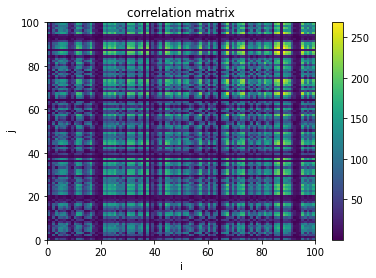

In [332]:
# print(first_100.shape)
C = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        C[i,j] = np.dot(X[:,i],X[:,j])
# print(C)
# print(C.shape)
plt.pcolor(C)
plt.colorbar()
plt.title("correlation matrix")
plt.xlabel("i")
plt.ylabel("j")

# (b)

The index i,j with the largest entry is (88, 88)
The index i,j with the largest entry is (86, 88)


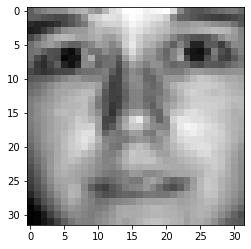

In [333]:
C_remove = C.copy()
# Find the index i,j with the largest entry
i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
np.fill_diagonal(C_remove, 0)

i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
print_copy = X[:,88]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

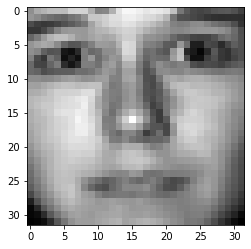

In [334]:
print_copy = X[:,86]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

In [335]:
# Find the index i,j with the smallest entry
small = 100
for i in range(100):
    for j in range(100):
        if C[i,j] < small and i!=j:
            small = C[i,j] 
            i_index = i
            j_index = j
print(f"The index i,j with the smallest entry is ({i_index}, {j_index})")
print(small)

The index i,j with the smallest entry is (54, 64)
0.002161908881199547


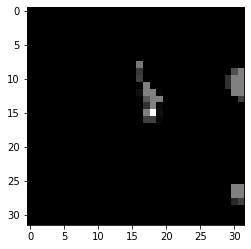

In [336]:
plt.imshow(X[:,64].reshape([32,32]),cmap = "gray")

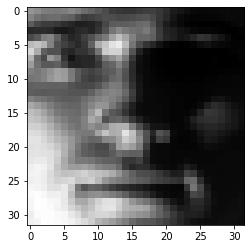

In [337]:
plt.imshow(X[:,54].reshape([32,32]),cmap = "gray")

# (C)

In [338]:
array_index = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
image_set = np.array([X[:,i] for i in array_index])
Y = np.matmul(image_set,np.transpose(image_set))
print(Y)
# print(image_set.shape)
# # print(first_100.shape)
# C = np.zeros([10,10])
# for i in range(10):
#     for j in range(10):
#         C[i,j] = np.dot(image_set[:,i],image_set[:,j])
# # print(C)
# # print(C.shape)
# plt.pcolor(C)
# plt.colorbar()
# plt.title("correlation matrix")
# plt.xlabel("i")
# plt.ylabel("j")

[[  5.46453924  12.21439488   4.64024179   8.57833297  18.98822454
    5.31794676   8.01234916   1.39143124   6.53956057   7.47051993]
 [ 12.21439488 139.76060596  29.90104725 115.96260681 174.68470841
   54.57734057  98.477619    14.24269446  87.47544268  78.33121744]
 [  4.64024179  29.90104725  17.96829393  29.57927486  35.75493236
   25.9210201   27.30896927   5.48095456  26.54033208  27.2826443 ]
 [  8.57833297 115.96260681  29.57927486 126.47059028 129.12043313
   75.16923359 106.43912516  13.65960003 100.08123276 100.12474403]
 [ 18.98822454 174.68470841  35.75493236 129.12043313 263.7982702
   47.25240887 102.97927654  17.59579669  82.7588955   71.91301176]
 [  5.31794676  54.57734057  25.9210201   75.16923359  47.25240887
   76.60804426  67.45138805  11.12508098  70.35763498  76.23717272]
 [  8.01234916  98.477619    27.30896927 106.43912516 102.97927654
   67.45138805  97.56246762  11.47778829  90.46887285  86.21995002]
 [  1.39143124  14.24269446   5.48095456  13.65960003  1

# (d)

In [339]:
eigenvalues, eigenvectors = np.linalg.eig(Y)
largest_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]
largest_eigenvectors = eigenvectors[:, largest_indices]
print(eigenvalues[:6])
print(largest_eigenvectors)

[713.33870265 161.61399041  22.02354571  19.41712931   8.38027015
   5.31059538]
[[ 0.03869707  0.03783016  0.1622829  -0.02355703  0.24581375 -0.29625619]
 [ 0.41992614  0.2332461  -0.25792295  0.04820211  0.35547802  0.60489026]
 [ 0.10955092 -0.04667231  0.38713126  0.22583555  0.58542017 -0.37711654]
 [ 0.40548351 -0.14336451 -0.3003095   0.06505605 -0.49397747 -0.30397759]
 [ 0.50758363  0.6897403   0.31311806 -0.10138951 -0.19036716 -0.14105249]
 [ 0.23825825 -0.37781562  0.55070325  0.50290698 -0.30599055  0.3072963 ]
 [ 0.34713941 -0.17942529 -0.36252432  0.27006021  0.12733122 -0.39459056]
 [ 0.04985904 -0.01003581  0.1512119   0.04049856  0.02966131  0.14061868]
 [ 0.32381819 -0.29581825 -0.2200035   0.04637739  0.28008017  0.14784566]
 [ 0.32169589 -0.42795389  0.25114968 -0.77586652  0.03275149  0.00776556]]


# (e)

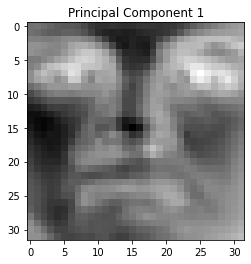

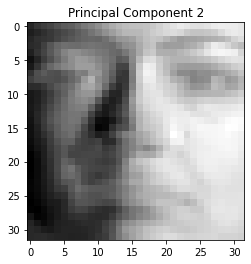

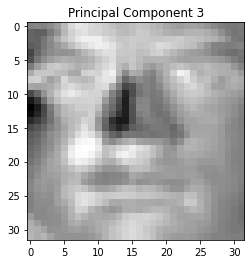

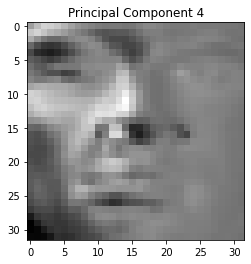

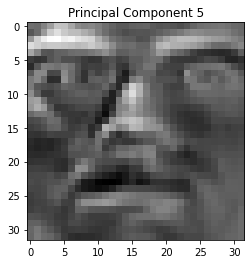

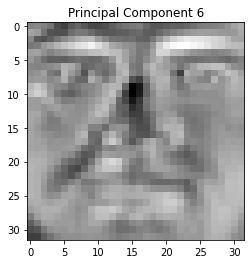

In [340]:
# Perform SVD on X
U, s, Vt = np.linalg.svd(image_set)

# Extract the first six principal components
PCs = Vt[:6, :].T

# Normalize principal components to have unit length
PCs_norm = np.linalg.norm(PCs, axis=0)
PCs = PCs / PCs_norm

# Show the first six principal components
for i in range(6):
    pc = PCs[:, i]
    pc_image = np.reshape(pc, (32, 32))
    plt.imshow(pc_image, cmap='gray')
    plt.title('Principal Component {}'.format(i+1))
    plt.show()

# (f)

In [341]:
u_1=U[0,:]
v_1 = eigenvectors[0,:]
l2_norm = np.sqrt(np.sum(np.square(np.abs(u_1)-np.abs(v_1))))

# (g)

Percentage of variance captured by the first 6 SVD modes:
[0.75795984 0.9296832  0.95308437 0.97371609 0.98262057 0.98826336]


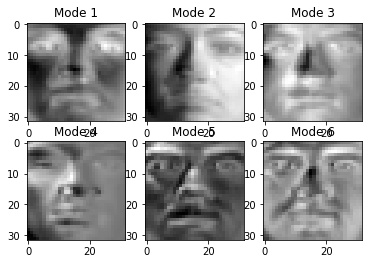

In [342]:
# Calculate the total variance of the data
total_var = np.sum(s**2)

# Calculate the percentage of variance captured by each of the first 6 SVD modes
var_capture = np.cumsum(s**2) / total_var
var_capture_6 = var_capture[:6]

print("Percentage of variance captured by the first 6 SVD modes:")
print(var_capture_6)

# Plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3)
axs = axs.ravel()

for i in range(6):
    axs[i].imshow(Vt[i].reshape((32, 32)), cmap='gray')
    axs[i].set_title(f"Mode {i+1}")

plt.show()